In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [174]:
time_df = pd.read_csv("time_data.csv")

In [206]:
len(np.unique(time_df['participant_number']))

24

In [175]:
time_df.head()

,participant_number,condition,menu_order,selection_time,correctly_predicted,error_in_trial
0,0,control,0,4073,True,False
1,0,control,0,2346,True,False
2,0,control,0,1072,True,False
3,0,control,0,1272,False,False
4,0,control,0,1904,True,False


In [176]:
np.sum(time_df['menu_order'])

2520

In [177]:
time_df.dtypes

participant_number      int64
condition              object
menu_order              int64
selection_time          int64
correctly_predicted      bool
error_in_trial           bool
dtype: object

In [178]:
time_df.describe()

,participant_number,menu_order,selection_time
count,4320.000000,4320.000000,4320.000000
mean,12.000000,0.583333,1818.491204
std,7.360653,0.493064,1120.501622
min,0.000000,0.000000,526.000000
25%,5.750000,0.000000,1173.000000
50%,12.000000,1.000000,1528.000000
75%,18.250000,1.000000,2152.000000
max,24.000000,1.000000,19888.000000


## (1) Average time per condition 

In [179]:
np.average(time_df['selection_time'][time_df['condition'] == "control"])

1918.8305555555555

In [180]:
np.average(time_df['selection_time'][time_df['condition'] != "control"])

1718.151851851852

## (2) Averge time per condition per Predicted vs Non-predicted trial

In [181]:
# average_speed = np.average(time_df['selection_time'], weights = (time_df['condition'] == "control"))
# average_speed/1000 # to seconds

#### (2a) Within control condition: compare predicted vs non-predicted

In [182]:
np.average(time_df['selection_time'][time_df['condition'] == "control"][time_df['correctly_predicted'] == True])

1899.367476851852

In [183]:
np.average(time_df['selection_time'][time_df['condition'] == "control"][time_df['correctly_predicted'] == False])

1996.6828703703704

#### (2b) Within ephemeral condition: compare predicted vs non-predicted trial

In [184]:
np.average(time_df['selection_time'][time_df['condition'] != "control"][time_df['correctly_predicted'] == True])

1655.226273148148

In [185]:
np.average(time_df['selection_time'][time_df['condition'] != "control"][time_df['correctly_predicted'] == False])

1969.8541666666667

## (3) Error rate

In [186]:
np.sum(time_df['error_in_trial'][time_df['condition'] == "control"])
# np.sum(time_df['condition'] == 'control')

8

In [187]:
np.average(time_df['error_in_trial'][time_df['condition'] == "control"])

0.003703703703703704

In [188]:
np.sum(time_df['error_in_trial'][time_df['condition'] != "control"])
# np.sum(time_df['condition'] != 'control')

3

In [189]:
np.average(time_df['error_in_trial'][time_df['condition'] != "control"])

0.001388888888888889

## Qualitative Questions

In [190]:
qual_df = pd.read_csv('qualitative_data.csv')
qual_df.head()

,participant_number,age,gender,menu_order,overall_preference,overall_easy,control_satisfaction,control_difficulty,control_frustration,control_efficiency,ephemeral_satisfaction,ephemeral_difficulty,ephemeral_frustration,ephemeral_efficiency
0,0,26-30,Male,0,Second two,Second two,4,7,2,4,4,7,2,4
1,1,21-25,Female,0,Second two,Second two,5,7,3,5,5,7,3,6
2,2,21-25,Male,1,First two,First two,5,6,6,5,6,6,6,5
3,3,26-30,Female,1,Second two,Second two,7,6,1,6,7,6,1,6
4,4,21-25,Other,1,First two,First two,6,5,1,5,5,7,1,6


In [191]:
qual_df.columns

Index(['participant_number', 'age', 'gender', 'menu_order',
       'overall_preference', 'overall_easy', 'control_satisfaction',
       'control_difficulty', 'control_frustration', 'control_efficiency',
       'ephemeral_satisfaction', 'ephemeral_difficulty',
       'ephemeral_frustration', 'ephemeral_efficiency'],
      dtype='object')

### Gender

In [192]:
np.sum(qual_df['gender'] == "Male")

14

In [193]:
len(qual_df['gender'])

24

In [194]:
np.sum(qual_df['menu_order'])

14

### Overall Preference

In [195]:
qual_df['overall_pref'] = qual_df['overall_preference']

In [196]:
qual_df.loc[(qual_df['menu_order'] == 0) & (qual_df['overall_pref'] == 'First two'), 'overall_pref'] = "Control"
qual_df.loc[(qual_df['menu_order'] == 0) & (qual_df['overall_pref'] == 'Second two'), 'overall_pref'] = "Ephermal"
qual_df.loc[(qual_df['menu_order'] == 1) & (qual_df['overall_pref'] == 'First two'), 'overall_pref'] = "Ephermal"
qual_df.loc[(qual_df['menu_order'] == 1) & (qual_df['overall_pref'] == 'Second two'), 'overall_pref'] = "Control"

In [197]:
qual_df[['menu_order', 'overall_preference', 'overall_pref']].head()

,menu_order,overall_preference,overall_pref
0,0,Second two,Ephermal
1,0,Second two,Ephermal
2,1,First two,Ephermal
3,1,Second two,Control
4,1,First two,Ephermal


In [208]:
print(str(np.sum(qual_df['overall_pref'] == "Ephermal")) + ' people prefer the Ephermal condition')
print(str(np.sum(qual_df['overall_pref'] == "Ephermal")/len(qual_df) * 100) + ' % of people prefer the Ephermal condition')

15 people prefer the Ephermal condition
62.5 % of people prefer the Ephermal condition


## Overall Easiness

In [209]:
qual_df['overall_easiness'] = qual_df['overall_easy']
qual_df.loc[(qual_df['menu_order'] == 0) & (qual_df['overall_easy'] == 'First two'), 'overall_easiness'] = "Control"
qual_df.loc[(qual_df['menu_order'] == 0) & (qual_df['overall_easy'] == 'Second two'), 'overall_easiness'] = "Ephermal"
qual_df.loc[(qual_df['menu_order'] == 1) & (qual_df['overall_easy'] == 'First two'), 'overall_easiness'] = "Ephermal"
qual_df.loc[(qual_df['menu_order'] == 1) & (qual_df['overall_easy'] == 'Second two'), 'overall_easiness'] = "Control"

In [210]:
qual_df[['menu_order', 'overall_easy', 'overall_easiness']].head()

,menu_order,overall_easy,overall_easiness
0,0,Second two,Ephermal
1,0,Second two,Ephermal
2,1,First two,Ephermal
3,1,Second two,Control
4,1,First two,Ephermal


In [211]:
print(str(np.sum(qual_df['overall_easiness'] == "Ephermal")) + ' people found the Ephermal condition easier to use')
print(str(np.sum(qual_df['overall_easiness'] == "Ephermal")/len(qual_df) * 100) + ' % of people found the Ephermal condition easier to use')

15 people found the Ephermal condition easier to use
62.5 % of people found the Ephermal condition easier to use


Note that: if people prefer the condition, they also say they found the condition easy to use.

## Qualitative Questions Analysis + Plot

In [199]:
from scipy.stats import wilcoxon

In [200]:
def plot_qual_function(x, y):
    fig, ax = plt.subplots(2, sharex=True)
    ax[0].hist(qual_df[x])
    ax[0].set_xlim([1,7])
    ax[0].set_title('Rating for ' + x)
    print('The average for ' + x +'is: ' + str(np.average(qual_df[x])))
    
    ax[1].hist(qual_df[y])
    ax[1].set_xlim([1,7])
    ax[1].set_title('Rating for ' + y)
    print('The average for ' + y +'is: '+ str(np.average(qual_df[y])))
    
    plt.show()
    print(wilcoxon(qual_df[x], qual_df[y]))

###  Difficulty

The average for control_difficultyis: 5.666666666666667
The average for ephemeral_difficultyis: 6.083333333333333


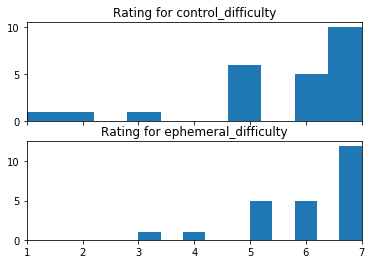

WilcoxonResult(statistic=7.5, pvalue=0.26319907816125776)


/Users/pwong/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:2388: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


In [201]:
plot_qual_function('control_difficulty', 'ephemeral_difficulty')

No significant difference on difficulty between the two conditions

### Satisfaction

The average for control_satisfactionis: 5.5
The average for ephemeral_satisfactionis: 5.25


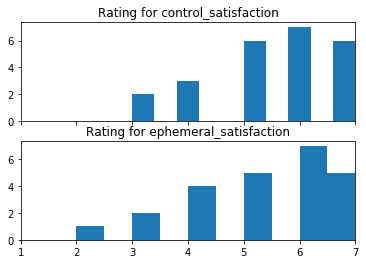

WilcoxonResult(statistic=14.0, pvalue=0.1445852799373539)


In [202]:
plot_qual_function('control_satisfaction', 'ephemeral_satisfaction')

Significant difference between control and ephermal on satisfaction that people found Control condition more satisfying to use. 

The average satisfaction rating for Control was 5.71 (out of 7), while the average rating for Ephermeral was 5.38 (out of 7). Control was more satisfying to use than Ephermeral (z=4.0, p = .034)

### Frustration

The average for control_frustrationis: 3.4166666666666665
The average for ephemeral_frustrationis: 3.5416666666666665


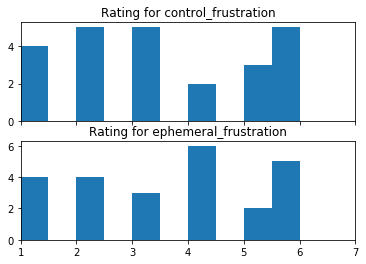

WilcoxonResult(statistic=26.0, pvalue=0.8755611072198808)


In [203]:
plot_qual_function('control_frustration', 'ephemeral_frustration')

No significant difference between control and ephermal on frustration

### Efficiency

The average for control_efficiencyis: 4.791666666666667
The average for ephemeral_efficiencyis: 5.125


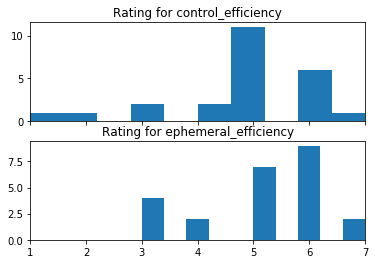

WilcoxonResult(statistic=19.5, pvalue=0.4026458293627345)


In [204]:
plot_qual_function('control_efficiency', 'ephemeral_efficiency')

No significant difference between control and ephermal on efficiency

In [141]:
qual_df.columns

Index(['participant_number', 'age', 'gender', 'menu_order',
       'overall_preference', 'overall_easy', 'control_satisfaction',
       'control_difficulty', 'control_frustration', 'control_efficiency',
       'ephemeral_satisfaction', 'ephemeral_difficulty',
       'ephemeral_frustration', 'ephemeral_efficiency'],
      dtype='object')